In [1]:
import pandas as pd
import numpy as np
from plotnine import *

In [45]:
import math

In [79]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [8]:
train.pivot_table(index = ['Sex'], values = ['Survived'])

,Survived
Sex,
female,0.742038
male,0.188908


C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


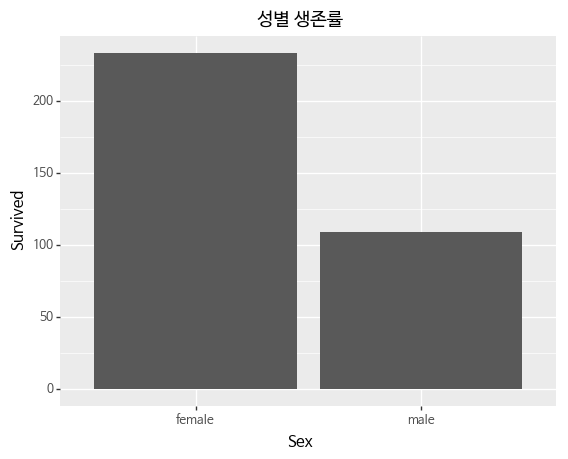

<ggplot: (-9223371894904829787)>

In [11]:
(ggplot(train)
 + aes(x='Sex', y='Survived')
 + geom_col()
 + ggtitle('성별 생존률')
 + theme(text=element_text(family='NanumBarunGothic'))
)

C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


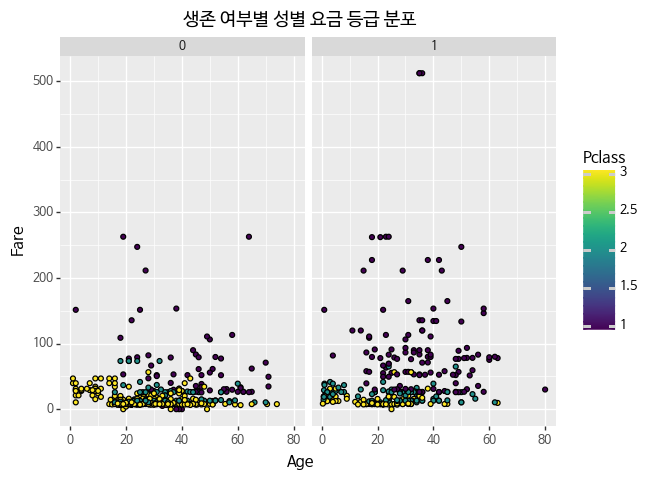

<ggplot: (141949969430)>

In [12]:
(ggplot(train)
 + aes(x='Age', y='Fare', fill='Pclass')
 + geom_point()
 + ggtitle('생존 여부별 성별 요금 등급 분포')
 + facet_wrap('~Survived')
 + theme(text=element_text(family='NanumBarunGothic'))
)


In [ ]:
(ggplot(train)
 + aes(x='Age', y='Fare', fill='Pclass')
 + geom_point()
 + ggtitle('생존 여부별 성별 요금 등급 분포')
 + facet_wrap('~Survived')
 + theme(text=element_text(family='NanumBarunGothic'))
)


In [13]:
train.pivot_table('Survived',['Sex', 'Pclass', 'Embarked'])

Survived
Sex    Pclass Embarked          
female 1      C         0.976744
              Q         1.000000
              S         0.958333
       2      C         1.000000
              Q         1.000000
              S         0.910448
       3      C         0.652174
              Q         0.727273
              S         0.375000
male   1      C         0.404762
              Q         0.000000
              S         0.354430
       2      C         0.200000
              Q         0.000000
              S         0.154639
       3      C         0.232558
              Q         0.076923
              S         0.128302

In [69]:
train['Age'] = train['Age'].dropna()
train['Age']=train['Age'].fillna(100)
train['Age1'] = (train['Age']//10)*10

In [70]:
train['Age1']

0       20.0
1       30.0
2       20.0
3       30.0
4       30.0
5      100.0
6       50.0
7        0.0
8       20.0
9       10.0
10       0.0
11      50.0
12      20.0
13      30.0
14      10.0
15      50.0
16       0.0
17     100.0
18      30.0
19     100.0
20      30.0
21      30.0
22      10.0
23      20.0
24       0.0
25      30.0
26     100.0
27      10.0
28     100.0
29     100.0
       ...  
861     20.0
862     40.0
863    100.0
864     20.0
865     40.0
866     20.0
867     30.0
868    100.0
869      0.0
870     20.0
871     40.0
872     30.0
873     40.0
874     20.0
875     10.0
876     20.0
877     10.0
878    100.0
879     50.0
880     20.0
881     30.0
882     20.0
883     20.0
884     20.0
885     30.0
886     20.0
887     10.0
888    100.0
889     20.0
890     30.0
Name: Age1, Length: 891, dtype: float64

In [62]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [73]:
train['Survived'] = train['Survived'].astype('category')
train['Pclass'] = train['Pclass'].astype('category')

In [74]:
male = train.loc[train['Sex']== 'male']
female = train.loc[train['Sex']=='female']

C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 124 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


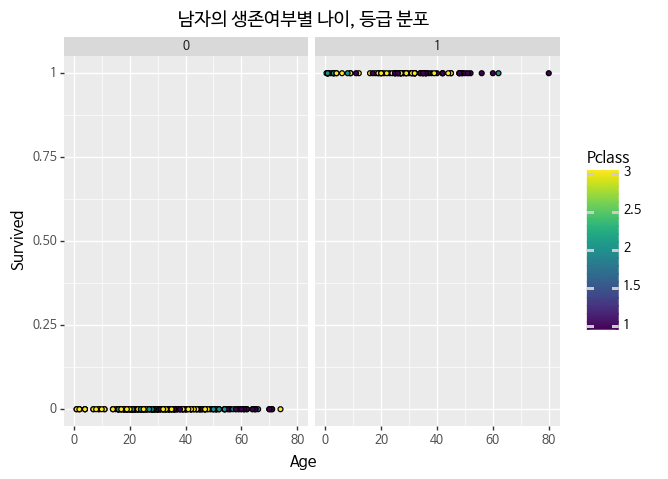

<ggplot: (-9223371894904420050)>

In [27]:
(ggplot(male)
 + aes(x='Age', y='Survived', fill='Pclass')
 + geom_point()
 + ggtitle('남자의 생존여부별 나이, 등급 분포')
 + facet_wrap('~Survived')
 + theme(text=element_text(family='NanumBarunGothic'))
)

C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\layer.py:363: UserWarning: stat_boxplot : Removed 124 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\positions\position.py:188: FutureWarning

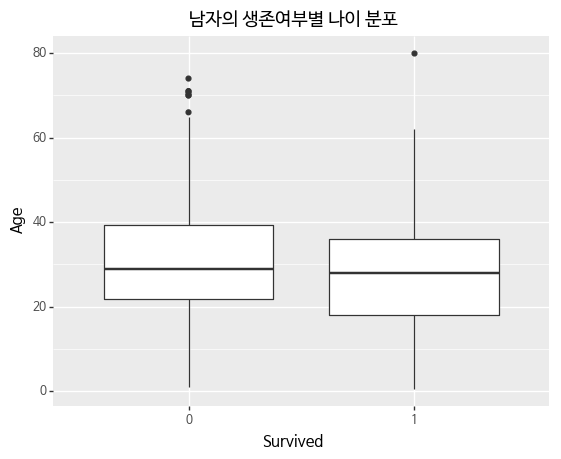

<ggplot: (-9223371894904504667)>

In [37]:
(ggplot(male)
 + aes(x='Survived', y='Age')
 + geom_boxplot()
 + ggtitle('남자의 생존여부별 나이 분포')
 + theme(text=element_text(family='NanumBarunGothic'))
)

C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\layer.py:363: UserWarning: stat_boxplot : Removed 53 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\positions\position.py:188: FutureWarning:

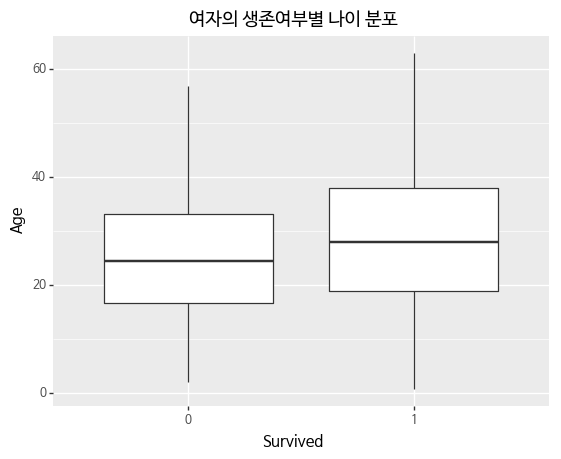

<ggplot: (141950497814)>

In [38]:
(ggplot(female)
 + aes(x='Survived', y='Age')
 + geom_boxplot()
 + ggtitle('여자의 생존여부별 나이 분포')
 + theme(text=element_text(family='NanumBarunGothic'))
)

C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\stats\stat_bindot.py:98: UserWarning: 'stat_bin()' using 'bins = 25'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


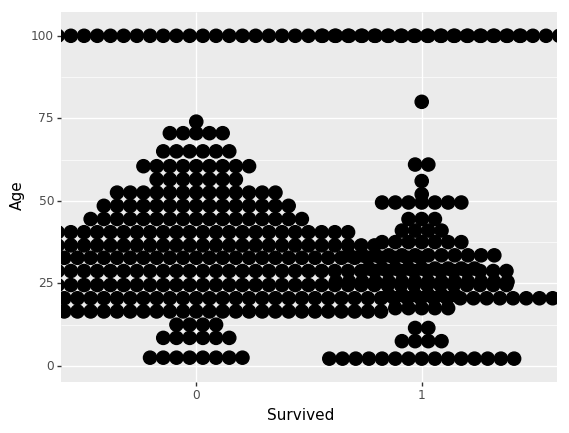

<ggplot: (141950529526)>

In [75]:
(ggplot(male)
 + aes(x = 'Survived', y = 'Age')
 + geom_dotplot(binaxis = 'y', stackdir = 'center')
)

C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


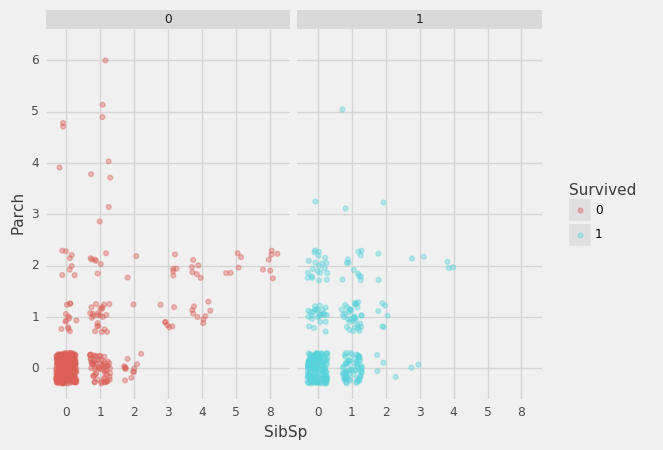

<ggplot: (-9223371894905216459)>

In [77]:
train['Parch'] = train['Parch'].astype('category')
train['SibSp'] = train['SibSp'].astype('category')
(ggplot(train)
+ aes(x='SibSp', y='Parch', color='Survived')
+ geom_jitter(alpha=0.4, width=0.3, height=0.3)
+ theme_538()
+ facet_wrap('~Survived')
)

In [ ]:
test['Survived'] = ()

In [78]:
male.pivot_table('Survived',['Age1', 'Pclass'])

DataError: No numeric types to aggregate

In [ ]:
submission = test[['PassengerId', 'Survived']]
submission['Survived'] = submission['Survived'].astype(int)
submission.to_csv('submissions/submission_female_9.csv', index=False)